# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

**1. What test is appropriate for this problem? Does CLT apply?**

If we break the dataset into two samples, one for the race = b and the other for race = w, then we can perform a two sample t-test on the datasets.

**2. What are the null and alternate hypothesis?**

$H_0$ The null hypothesis: That race does not impact the probability of receiving a callback.

$H_A$ The alternate hypothesis: That race does impact the probability of receiving a callback.

In [6]:
#Create a new DataFrame with only the necessary columns needed, race and call.
df_race_call = data[['race', 'call']]
print(df_race_call.head())

  race  call
0    w   0.0
1    w   0.0
2    b   0.0
3    b   0.0
4    w   0.0


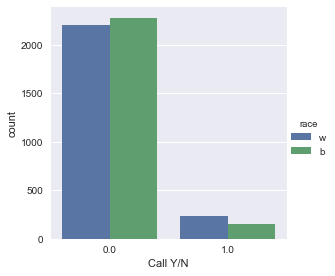

In [7]:
#Graph the number of no callbacks and callbacks for each race.

import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.factorplot(x='call', hue='race', data=df_race_call, kind='count')
_ = plt.xlabel('Call Y/N')
plt.show()


In [9]:
b = df_race_call[df_race_call['race'] == 'b']
w = df_race_call[df_race_call['race'] == 'w']

print(b.info())
print(w.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 2 to 4868
Data columns (total 2 columns):
race    2435 non-null object
call    2435 non-null float32
dtypes: float32(1), object(1)
memory usage: 47.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 4869
Data columns (total 2 columns):
race    2435 non-null object
call    2435 non-null float32
dtypes: float32(1), object(1)
memory usage: 47.6+ KB
None


In [29]:
b_cb = b['call'].sum()
w_cb = w['call'].sum()
len_w = len(w['call'])
len_b = len(b['call'])
b_frac = b_cb/len_b
w_frac = w_cb/len_w
print(b_frac)
print(w_frac)

0.064476386037
0.0965092402464


**3. Compute margin of error, confidence interval, and p-value.**

In [17]:
mean_diff = np.mean(w['call']) - np.mean([b['call']])
combined_mean = np.mean(data['call'])
print(mean_diff)
print(combined_mean)

0.0320328548551
0.0804928168654


In [31]:
#Compute Margin of Error
z = 1.96 #z-score for 95% confidence

se = np.sqrt(w['call'].var() / len_w + b['call'].var() / len_b) 

margin_of_error = z * se
print'Margin of Error is: ', margin_of_error

#Compute Confidence Intervals
conf_int = [mean_diff - margin_of_error, mean_diff + margin_of_error]
print'Confidence Intervals: ', conf_int

#Compute the P-Value:
two_sample = stats.ttest_ind(w['call'], b['call'])
print(two_sample)
print'P-Value: ',two_sample[1]

Margin of Error is:  0.0152584173807
Confidence Intervals:  [0.016774437474368575, 0.047291272235752579]
Ttest_indResult(statistic=4.1147052908617514, pvalue=3.9408021031288859e-05)
P-Value:  3.94080210313e-05


**4. Write a story describing the statistical significance in the context of the original problem.**

There does appear be racial discrimination regarding the likelihood for a callback depending upon if the candidates name in "white sounding" versus "black sounding". The fraction of "white sounding" names that received a callback was 9.65% versus only 6.44% for the "black sounding" names. Further, the high p-value of 3.94 indicates strong evidence against the null hypothesis (that there is no racial bias).


**5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? **

This analysis is only looking at two factors, the race (based on the name) and a callback (y/n). What this analysis does not take into consideration is a number of other factors that could contribute to the likelihood of a callback such as years of experience (or lack thereof if it's an entry level position), educational background, skillset (such as computer skills). There could even potentially be other discriminatory factors at play here such as age descrimination and/or gender discrimination. This analysis also isn't taking into account the type of position the applicant applied for, i.e. was the likelihood for a call back increased or decreased because the person applied for a job they were highly qualified for or a job that was outside their field of expertise.